In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SEED = 1234
np.random.seed(SEED)

In [2]:
csv_file = "../merged_csv.csv"
df = pd.read_csv(csv_file)

log = open("log_file", "w")
df.columns

Index(['Post Created Date', 'Post Created Time', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message', 'Link', 'Score', 'comment_csv', 'comment_neg', 'comment_pos',
       'comment_total', 'timestamp', 'week_day', 'time_slot', 'polarity',
       'polarity_class'],
      dtype='object')

In [3]:
X = df[ ['comment_pos', 'comment_neg'] ]
y = df["polarity_class"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

print("Scaled X")
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

Scaled X
[[-0.1916275  -0.52660675]
 [-0.9749287  -1.78517833]
 [-1.44490942 -1.15589254]
 ...
 [ 0.43501346 -0.52660675]
 [ 0.27835322 -0.31684482]
 [-0.50494798  0.73196484]]


# Neighbors
### KNN Regressor

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.12      0.06      0.08        18
           6       0.00      0.00      0.00        14
           7       0.73      0.96      0.83       200

    accuracy                           0.71       272
   macro avg       0.11      0.13      0.11       272
weighted avg       0.55      0.71      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


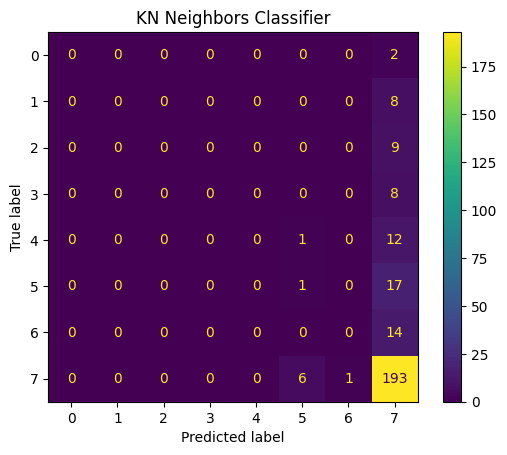

<Figure size 640x480 with 0 Axes>

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("KNN")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("KN Neighbors Classifier")
plt.show()
plt.clf()

#   Linear Models
### Logistics Reg

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      1.00      0.85       200

    accuracy                           0.74       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.54      0.74      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


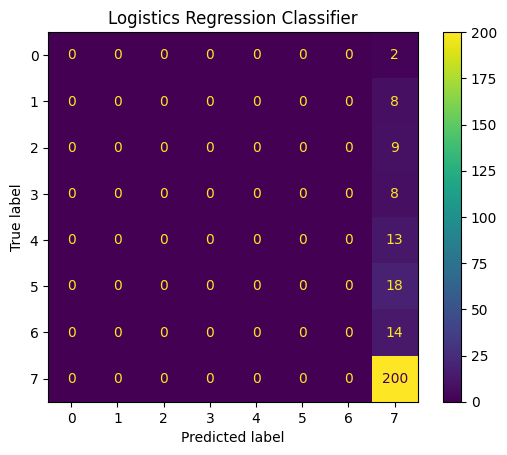

<Figure size 640x480 with 0 Axes>

In [5]:
lin = LogisticRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("Log Reg")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Logistics Regression Classifier")
plt.show()
plt.clf()

### SGDRegressor

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      0.99      0.85       200

    accuracy                           0.73       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.55      0.73      0.63       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


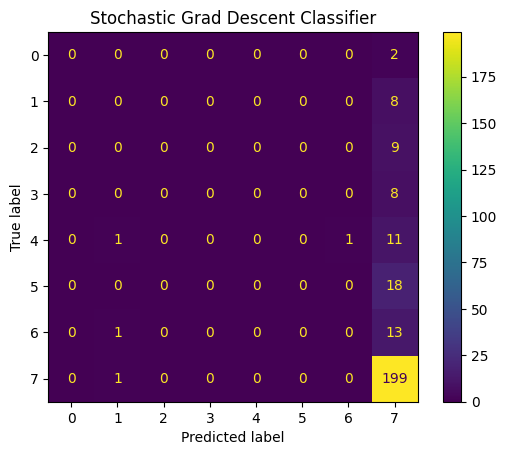

<Figure size 640x480 with 0 Axes>

In [6]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("SGD Reg")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Stochastic Grad Descent Classifier")
plt.show()
plt.clf()

#### GradientBoostingRegressor

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.73      0.97      0.84       200

    accuracy                           0.72       272
   macro avg       0.09      0.12      0.10       272
weighted avg       0.54      0.72      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


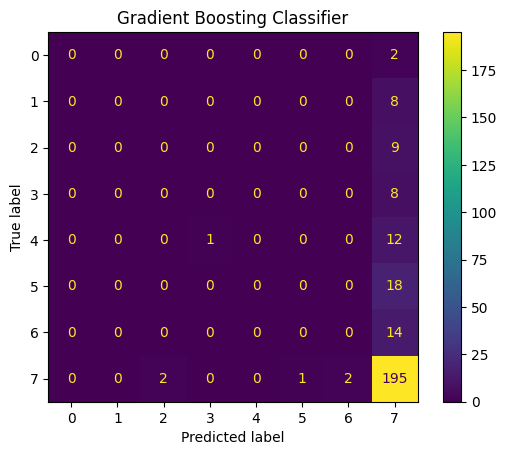

<Figure size 640x480 with 0 Axes>

In [7]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("GBR Reg")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Gradient Boosting Classifier")
plt.show()
plt.clf()

#### Random Forest

d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.73      0.97      0.83       200

    accuracy                           0.71       272
   macro avg       0.09      0.12      0.10       272
weighted avg       0.54      0.71      0.61       272



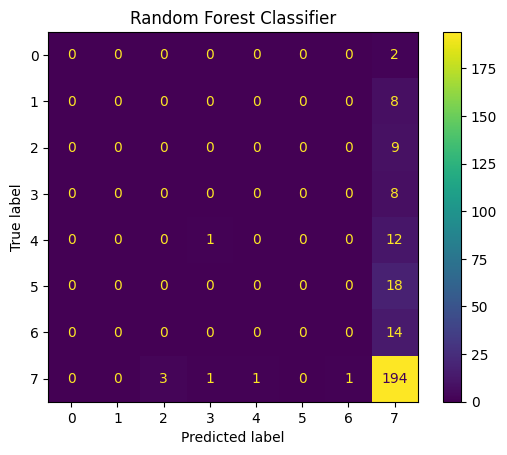

<Figure size 640x480 with 0 Axes>

In [8]:
ranf = RandomForestClassifier(
    n_estimators=8,
    criterion="entropy",
    random_state=SEED
)
ranf.fit(X_train, y_train)
y_pred = ranf.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("Random Forest")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Random Forest Classifier")
plt.show()
plt.clf()

#### Decision Tree Gini

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      0.99      0.85       200

    accuracy                           0.73       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.54      0.73      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


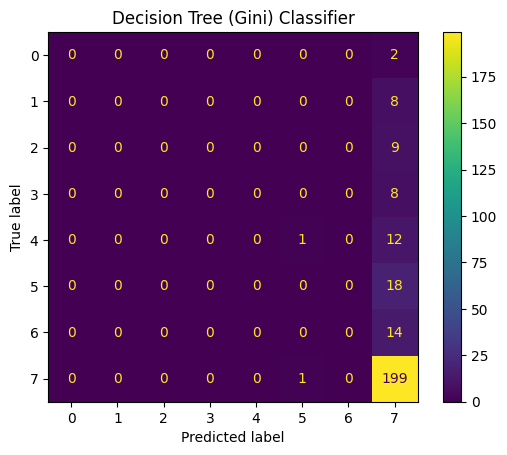

<Figure size 640x480 with 0 Axes>

In [9]:
dec = DecisionTreeClassifier(
    random_state=SEED,
    max_depth=5,
    min_samples_leaf=5,
    criterion="gini"
)
dec.fit(X_train, y_train)
y_pred = dec.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("Dec Tree Gini")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Decision Tree (Gini) Classifier")
plt.show()
plt.clf()

#### Decision Tree Entropy

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      1.00      0.85       200

    accuracy                           0.74       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.54      0.74      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


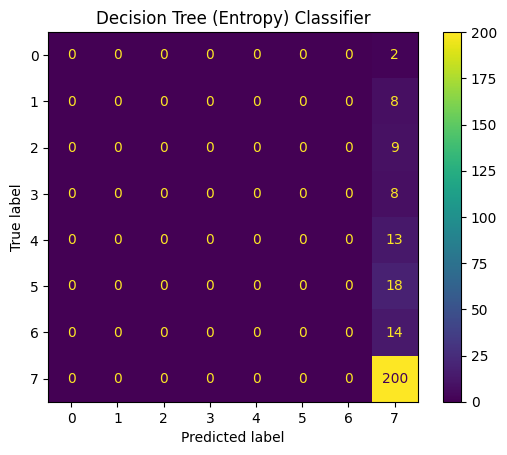

<Figure size 640x480 with 0 Axes>

In [10]:
dec = DecisionTreeClassifier(
    random_state=SEED,
    max_depth=100,
    min_samples_leaf=8,
    criterion="entropy"
)
dec.fit(X_train, y_train)
y_pred = dec.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("Dec Tree Entr")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Decision Tree (Entropy) Classifier")
plt.show()
plt.clf()

### XGBoost

d:\ProgramFiles\python3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no p

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      0.99      0.85       200

    accuracy                           0.73       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.54      0.73      0.62       272



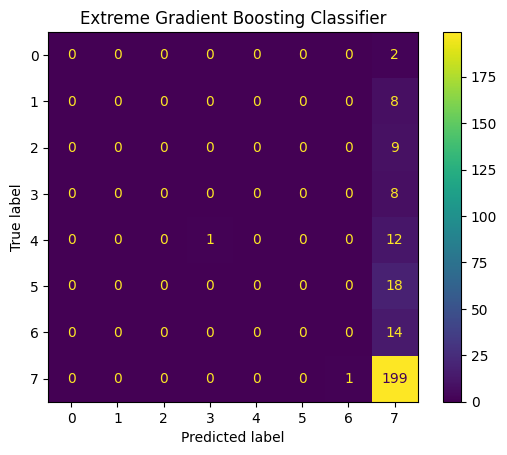

<Figure size 640x480 with 0 Axes>

In [11]:
xgb = XGBClassifier(
    gamma=0.11,
    use_label_encoder=False
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("XGBoost")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Extreme Gradient Boosting Classifier")
plt.show()
plt.clf()

#### SVC

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.17      0.25         6
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.45      0.31      0.37        16
           6       0.38      0.27      0.32        11
           7       0.83      1.00      0.90       128

    accuracy                           0.76       181
   macro avg       0.29      0.24      0.25       181
weighted avg       0.67      0.76      0.71       181



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


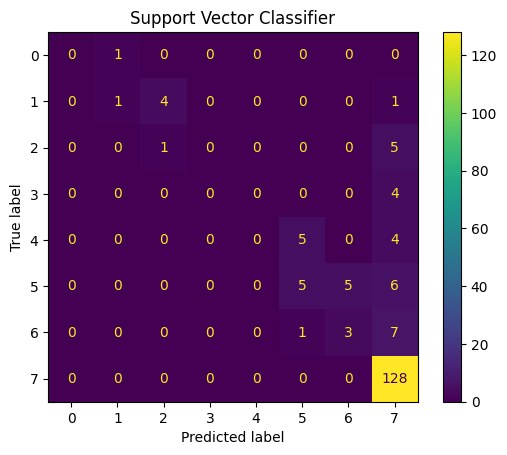

d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        14
           7       0.74      1.00      0.85       200

    accuracy                           0.74       272
   macro avg       0.09      0.12      0.11       272
weighted avg       0.54      0.74      0.62       272



d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 0 Axes>

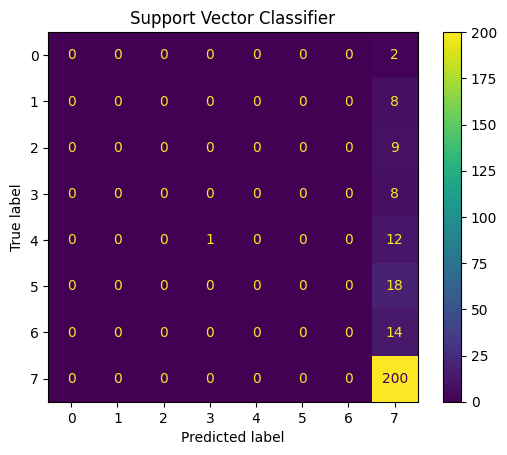

<Figure size 640x480 with 0 Axes>

In [12]:
t = [6, 7, 7, 7, 5, 7, 7, 4, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 1, 7, 7, 5, 7, 6, 6, 7, 7, 4, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 1, 7, 5, 7, 7, 7, 7, 4, 7, 7, 7, 7, 5, 0, 7, 7, 5, 2, 6, 5, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 5, 7, 5, 7, 7, 5, 7, 4, 5, 1, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 3, 5, 7, 7, 7, 1, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 6, 4, 7, 7, 4, 7, 2, 6, 7, 7, 7, 7, 5, 7, 2, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 3, 7, 7, 3, 7, 2, 4, 7, 5, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 6, 3, 7, 2, 7, 7, 7]
p = [6, 7, 7, 7, 6, 7, 7, 5, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 1, 7, 7, 6, 7, 6, 6, 7, 7, 5, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 2, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 1, 7, 7, 6, 2, 7, 6, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7, 5, 7, 7, 6, 7, 5, 5, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

print(classification_report(t, p))
conf_dis = ConfusionMatrixDisplay(confusion_matrix(t, p))
conf_dis.plot()
plt.title("Support Vector Classifier")
plt.show()
plt.clf()

svr = SVC()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

report = classification_report(y_test, y_pred)
log.write("SVC")
log.write(f"\n{report}\n")
print(report)

conf_dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_dis.plot()
plt.title("Support Vector Classifier")
plt.show()
plt.clf()

In [13]:
log.close()